<a href="https://colab.research.google.com/github/henryfuentesbenito/TFM/blob/main/Data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
project_dir = '/content/drive/MyDrive/relationalgnns1'
os.chdir(project_dir)

In [3]:
pip install andi_datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.8 MB/s eta 0:00:00


**Modelo de dimerizacion**

In [ ]:
from andi_datasets.models_phenom import models_phenom
import numpy as np
import stochastic

# number of time steps per trajectory (frames)
T = 50
# number of trajectories
N = 2
# Length of box (pixels)
L = 1.5*128
# diffusion coefficient (pixels^2 / frame)
D = 0.1

trajs_model3, labels_model3 = models_phenom().dimerization(N = N,
                                                           L = L,
                                                           T = T,
                                                           alphas = [1, 0.9], # Fixed alpha for each state
                                                           Ds = [10*D, 1.0*D], # Fixed D for each state
                                                           r = 1, # Radius of the particles
                                                           Pb = 1, # Binding probability
                                                           Pu = 0.2 # Unbinding probability
                                                           )

In [ ]:
print(labels_model3)

[[[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [1. 1. 2.]
  [1. 1. 2.]]

 [[1. 1. 2.]
  [

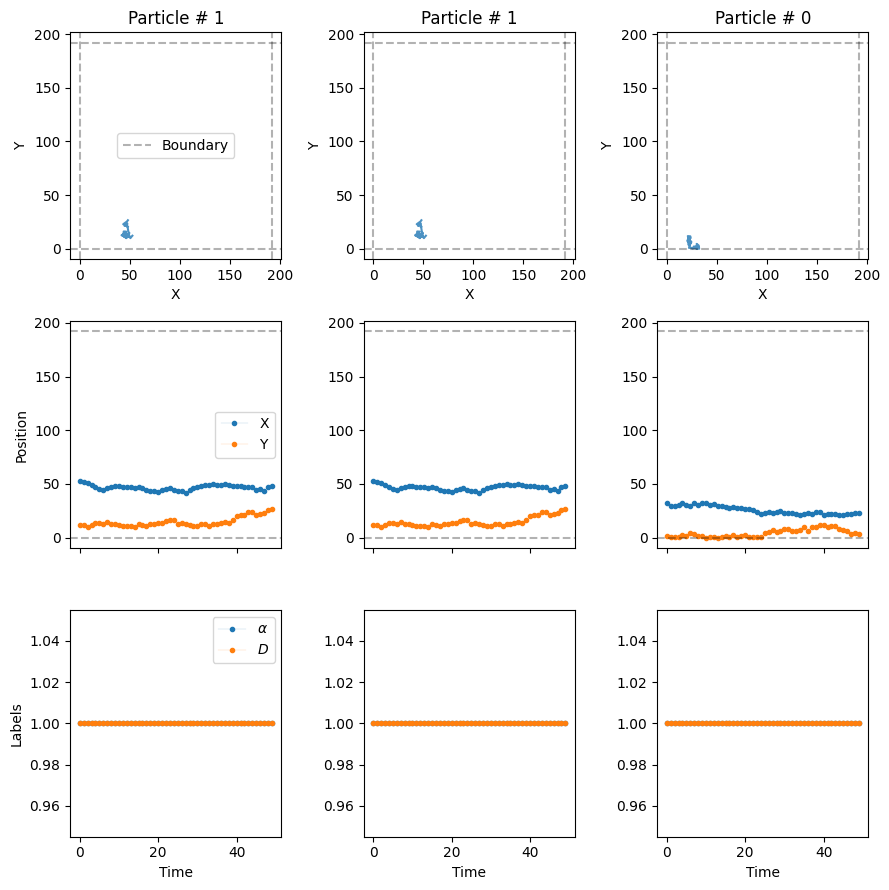

In [ ]:
plot_trajs(trajs_model3, L, N, labels = labels_model3, plot_labels = True)



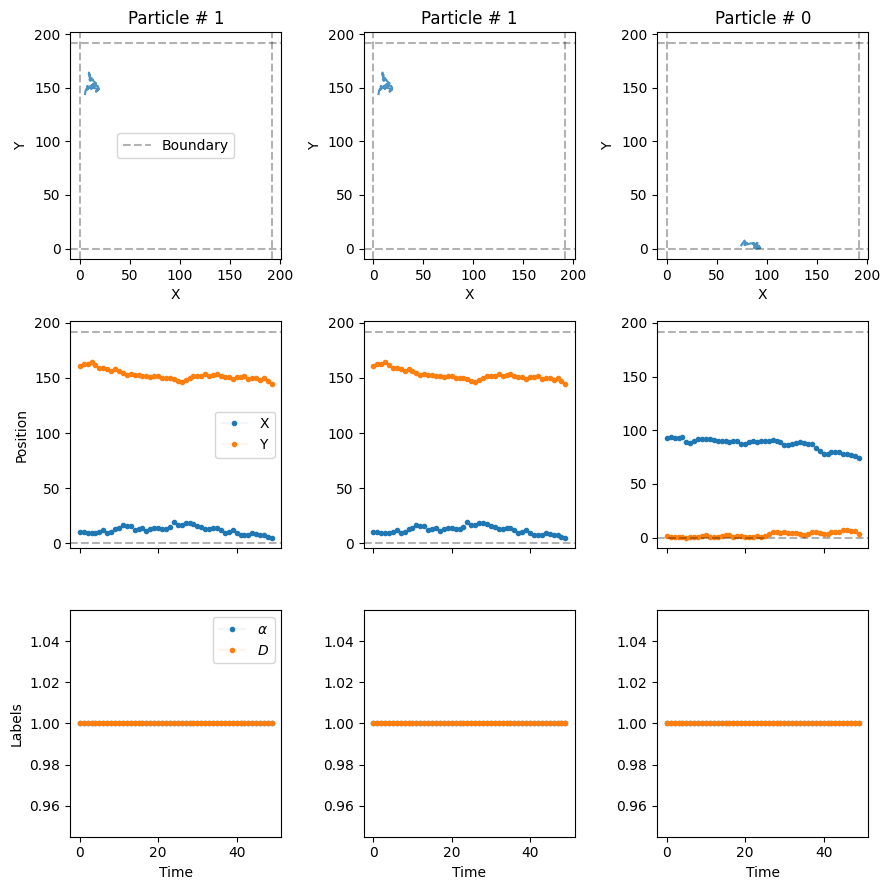

In [ ]:
from andi_datasets.utils_trajectories import plot_trajs

plot_trajs(trajs_model3, L, N, labels = labels_model3, plot_labels = True)

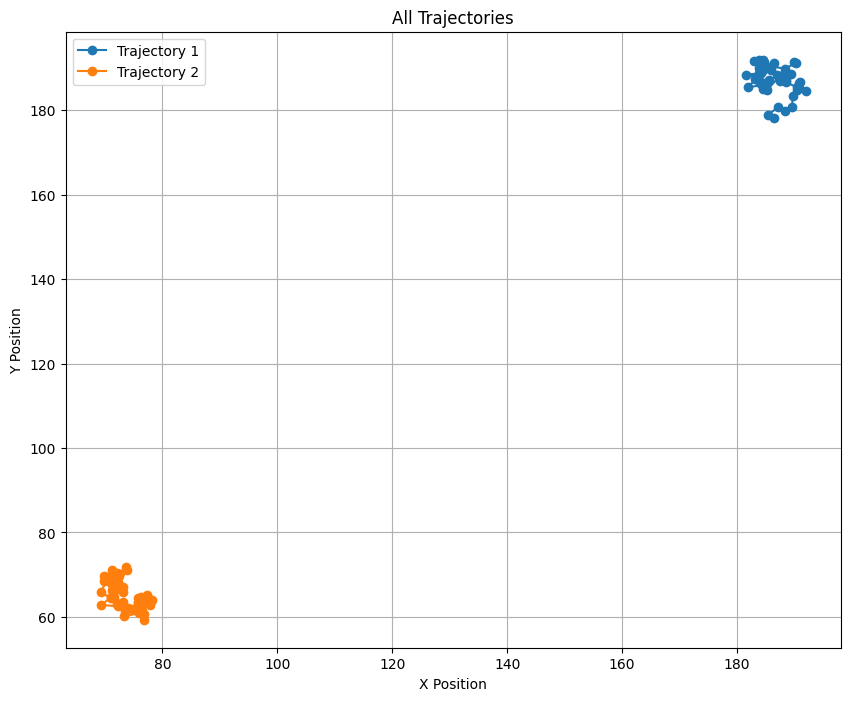

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 8))

for i in range(N):
    trajectory = trajs_model3[:, i, :]
    plt.plot(trajectory[:, 0], trajectory[:, 1], linestyle='-', marker='o', label=f'Trajectory {i+1}')


plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('All Trajectories')
plt.legend(loc='best')
plt.grid(True)
plt.show()

__________________________________
________________________________
____________________________________

**Generar datos del modelo de dimerizacion**

_________________________________________________
__________________________________________________
_________________________________________

In [ ]:
import numpy as np
from andi_datasets.models_phenom import models_phenom

all_data = []

def generate_and_store_data(T, N, L, D, alphas, Ds, r, Pb, Pu):
    while True:
        trajs_model3, labels_model3 = models_phenom().dimerization(
            N=N,
            L=L,
            T=T,
            alphas=alphas,  # Exponentes anómalos
            Ds=Ds,  # Coeficientes de difusión
            r=r,  # Radio de las partículas
            Pb=Pb,  # Probabilidad de unión
            Pu=Pu  # Probabilidad de desunión
        )

        has_dimerization = any(np.any(labels_model3[:, i, 0] == 0.9) for i in range(N))

        if has_dimerization:
            all_data.append((trajs_model3, labels_model3))
            break

T = 50  # Número de pasos de tiempo por trayectoria
N = 2  # Número de trayectorias
L = 1.5 * 128  # Tamaño de la caja (en píxeles)
D = 0.1  # Coeficiente de difusión (en píxeles^2 / frame)
alphas = [1.0, 0.9]  # Exponentes anómalos
Ds = [10 * D, 1.0 * D]  # Coeficientes de difusión
r = 1  # Radio de las partículas
Pb = 1  # Probabilidad de unión
Pu = 0.1 # Probabilidad de desunión (para que se separen después de unirse)

for i in range(1000):
    generate_and_store_data(T, N, L, D, alphas, Ds, r, Pb, Pu)

print("Generated 1000 datasets with dimerization")

for i, (trajs, labels) in enumerate(all_data[:5]):
    print(f"Dataset {i+1}:")
    print("Trajectories:")
    print(trajs)
    print("Labels:")
    print(labels)
    print("\n")

Generated 1000 datasets with dimerization
Dataset 1:
Trajectories:
[[[ 92.64677244 103.86602156]
  [ 87.76973123 112.04659375]]

 [[ 94.15240041 102.28904732]
  [ 87.08018451 113.22234964]]

 [[ 94.35364148 102.35398092]
  [ 88.12696794 112.52745471]]

 [[ 93.575453   101.08050057]
  [ 87.976669   112.32106822]]

 [[ 93.13006836 102.47784518]
  [ 88.89027659 111.98340822]]

 [[ 91.39798425 102.45649582]
  [ 89.40969258 113.69841388]]

 [[ 94.0001994  103.62448296]
  [ 88.01479663 113.84086959]]

 [[ 91.15283824 104.92956745]
  [ 89.50399264 114.21477866]]

 [[ 88.87325025 107.23651451]
  [ 89.00122328 115.13920713]]

 [[ 87.69290388 108.17451063]
  [ 86.89212893 113.76913731]]

 [[ 87.94800355 107.14693847]
  [ 86.19770811 114.11002741]]

 [[ 91.16854678 105.48158248]
  [ 85.32216737 115.41327087]]

 [[ 88.49926364 106.14803163]
  [ 87.07478076 117.07720146]]

 [[ 88.55526377 105.63284447]
  [ 87.24535079 118.37000901]]

 [[ 91.51804835 105.64476551]
  [ 86.67211363 118.08653892]]

 [[

In [ ]:
len(all_data)

1000

In [ ]:
import torch
import numpy as np

# Parámetros
num_datasets = len(all_data)
timesteps = 50
num_particles = 2
num_features = 2  # Solo x, y

# Inicializar tensores vacíos
train_feats = torch.zeros((num_datasets, timesteps, num_particles, num_features))
train_edges = torch.zeros((num_datasets, timesteps, num_particles * (num_particles - 1)))

for i, (trajs, labels) in enumerate(all_data):
    for t in range(timesteps):
        for p in range(num_particles):
            x, y = trajs[t][p]
            train_feats[i, t, p, :] = torch.tensor([x, y])

            # Determinar si las partículas interactúan
            if num_particles == 2:
                interact = 1 if labels[t][0][0] == 0.9 and labels[t][1][0] == 0.9 else 0
                train_edges[i, t, 0] = interact

In [ ]:
print(len(train_feats))
print(len(train_edges))

1000
1000


In [ ]:
torch.save(train_feats, 'train_feats')
torch.save(train_edges, 'train_edges')

In [ ]:
print("train_feats shape:", train_feats.shape)
print("train_feats:", train_feats[1])
print("train_edges shape:", train_edges.shape)
print("train_edges", train_edges[1])

train_feats shape: torch.Size([1000, 50, 2, 2])
train_feats: tensor([[[187.7380,  49.0121],
         [184.8961,  42.5248]],

        [[187.6824,  50.0639],
         [185.1729,  42.6230]],

        [[185.1719,  48.8485],
         [184.8359,  41.7442]],

        [[186.3704,  46.1531],
         [186.7907,  38.6035]],

        [[188.0661,  45.0143],
         [187.2013,  39.6569]],

        [[189.8460,  43.7183],
         [188.1588,  38.1012]],

        [[190.8225,  44.7749],
         [191.5068,  38.3200]],

        [[190.9797,  43.6965],
         [188.7117,  38.4170]],

        [[190.6916,  42.0834],
         [188.5450,  36.9548]],

        [[189.7005,  42.5963],
         [188.6037,  36.8863]],

        [[190.0856,  41.9138],
         [190.2704,  38.2534]],

        [[188.2802,  39.8689],
         [191.4046,  36.6034]],

        [[186.4323,  40.4807],
         [189.1590,  35.3917]],

        [[186.4784,  40.9680],
         [189.6244,  35.7200]],

        [[185.5023,  40.1527],
         [18

In [5]:

data_path = "/content/drive/MyDrive/relationalgnns/datasets"
train_feats_path = os.path.join(data_path, "train_feats")
train_edges_path = os.path.join(data_path, "train_edges")

# Cargar los datos
train_feats = torch.load(train_feats_path)
train_edges = torch.load(train_edges_path)

# Verificar dimensiones y contenido
print("Dimensiones de train_feats:", train_feats.shape)
print("Contenido de train_feats:")
print(train_feats)

print("Dimensiones de train_edges:", train_edges.shape)
print("Contenido de train_edges:")
print(train_edges)

<ipython-input-5-a97024558918>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_feats = torch.load(train_feats_path)
<ipython-input-5-a97024558918>:7: FutureWarning: Y

Dimensiones de train_feats: torch.Size([10, 50, 3, 2])
Contenido de train_feats:
tensor([[[[ 6.5144,  4.4320],
          [ 8.7049,  5.7779],
          [12.0011,  9.1241]],

         [[ 6.6748,  4.9801],
          [ 7.5051,  5.3819],
          [11.4715,  9.6879]],

         [[ 6.3219,  5.4690],
          [ 7.1522,  5.8708],
          [12.6453, 11.1228]],

         ...,

         [[ 5.6405,  1.8477],
          [ 5.3435,  1.7544],
          [12.4649,  3.0651]],

         [[ 5.7736,  1.2578],
          [ 5.4766,  1.1644],
          [12.1248,  1.6279]],

         [[ 6.4037,  0.7286],
          [ 4.2527,  0.9296],
          [11.8857,  0.3338]]],


        [[[ 4.7816,  1.0040],
          [ 7.4362,  2.7154],
          [13.3888, 17.9825]],

         [[ 5.0879,  1.0246],
          [ 4.2223,  2.1889],
          [12.2157, 16.4529]],

         [[ 5.4025,  1.0762],
          [ 4.5368,  2.2405],
          [12.6499, 15.0073]],

         ...,

         [[ 2.8257,  0.8788],
          [10.2930,  0.6403],

__________________________________________
_________________________________________________
________________________________________________

**Entrenamiento del modelo con los datos de dimerizacion**

__________________________________________________________
__________________________________________________________
__________________________________________________________

In [6]:
pip install torch numpy tqdm

In [7]:
import os
project_dir = '/content/drive/MyDrive/relationalgnns'
os.chdir(project_dir)

In [ ]:
!python train.py

Epochs:   0% 0/100 [00:00<?, ?it/s]
Batches:   0% 0/512 [00:00<?, ?it/s]
Batches:   0% 0/512 [00:00<?, ?it/s, loss=437, nll=437, kl=0.0386, lr=0.0005]
Batches:   0% 1/512 [00:00<05:39,  1.51it/s, loss=437, nll=437, kl=0.0386, lr=0.0005]
Batches:   0% 1/512 [00:00<05:39,  1.51it/s, loss=353, nll=353, kl=0.0233, lr=0.0005]
Batches:   0% 2/512 [00:00<03:25,  2.48it/s, loss=353, nll=353, kl=0.0233, lr=0.0005]
Batches:   0% 2/512 [00:01<03:25,  2.48it/s, loss=319, nll=319, kl=0.0223, lr=0.0005]
Batches:   1% 3/512 [00:01<02:38,  3.20it/s, loss=319, nll=319, kl=0.0223, lr=0.0005]
Batches:   1% 3/512 [00:01<02:38,  3.20it/s, loss=332, nll=332, kl=0.0243, lr=0.0005]
Batches:   1% 4/512 [00:01<02:19,  3.65it/s, loss=332, nll=332, kl=0.0243, lr=0.0005]
Batches:   1% 4/512 [00:01<02:19,  3.65it/s, loss=317, nll=317, kl=0.0196, lr=0.0005]
Batches:   1% 5/512 [00:01<02:02,  4.13it/s, loss=317, nll=317, kl=0.0196, lr=0.0005]
Batches:   1% 5/512 [00:01<02:02,  4.13it/s, loss=358, nll=358, kl=0.016, l

_____________________________________________________________
_____________________________________________________________
_____________________________________________________________

**Evaluacion del modelo**

_____________________________________________________________
_________________________________________________________
__________________________________________________________

In [8]:
import torch
from torch.utils.data import DataLoader

import relg

In [9]:
dataset = relg.SynthDataLoader(
    "datasets", "train")

/content/drive/MyDrive/relationalgnns/relg/sim/loaders.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.feats = torch.load(path)
/content/drive/MyDrive/relationalgn

In [10]:
data = iter(dataset)

In [24]:
d = next(data)
inputs = d["inputs"]

In [12]:
d

{'inputs': tensor([[[-0.2761, -0.5076],
          [-0.0327, -0.3580],
          [ 0.3336,  0.0139]],
 
         [[-0.2583, -0.4466],
          [-0.1660, -0.4020],
          [ 0.2748,  0.0765]],
 
         [[-0.2975, -0.3923],
          [-0.2053, -0.3477],
          [ 0.4052,  0.2360]],
 
         [[-0.3098, -0.4380],
          [-0.2175, -0.3933],
          [ 0.4121,  0.1822]],
 
         [[-0.3026, -0.4853],
          [-0.2103, -0.4407],
          [ 0.5857,  0.3089]],
 
         [[-0.2968, -0.4522],
          [-0.2046, -0.4076],
          [ 0.4893,  0.3576]],
 
         [[-0.2919, -0.5465],
          [-0.1996, -0.5019],
          [ 0.4926,  0.2702]],
 
         [[-0.3647, -0.5347],
          [-0.2725, -0.4900],
          [ 0.4370,  0.2255]],
 
         [[-0.3371, -0.5027],
          [-0.2449, -0.4581],
          [ 0.4657,  0.3305]],
 
         [[-0.3273, -0.4793],
          [-0.2350, -0.4347],
          [ 0.2798,  0.3838]],
 
         [[ 0.0158, -0.1316],
          [-0.3363, -0.4449],


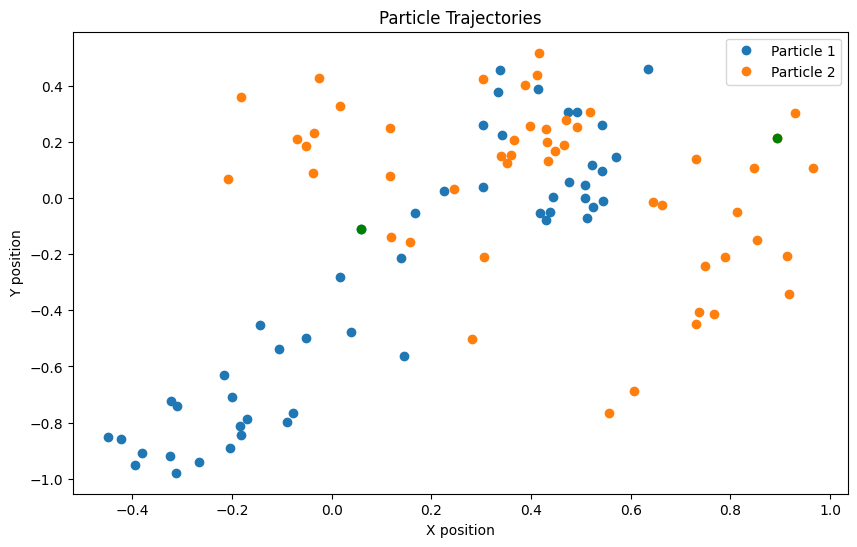

In [25]:
import matplotlib.pyplot as plt

# Visualizar las trayectorias de las partículas
plt.figure(figsize=(10, 6))

# Partículas en todos los pasos de tiempo
for p in range(2):
    plt.plot(inputs[:, p, 0], inputs[:, p, 1], "o", label=f"Particle {p+1}")

# Posiciones iniciales de las partículas
for p in range(2):
    plt.plot(inputs[0, p, 0], inputs[0, p, 1], "o", color="green")

plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Particle Trajectories')
plt.legend()
plt.show()

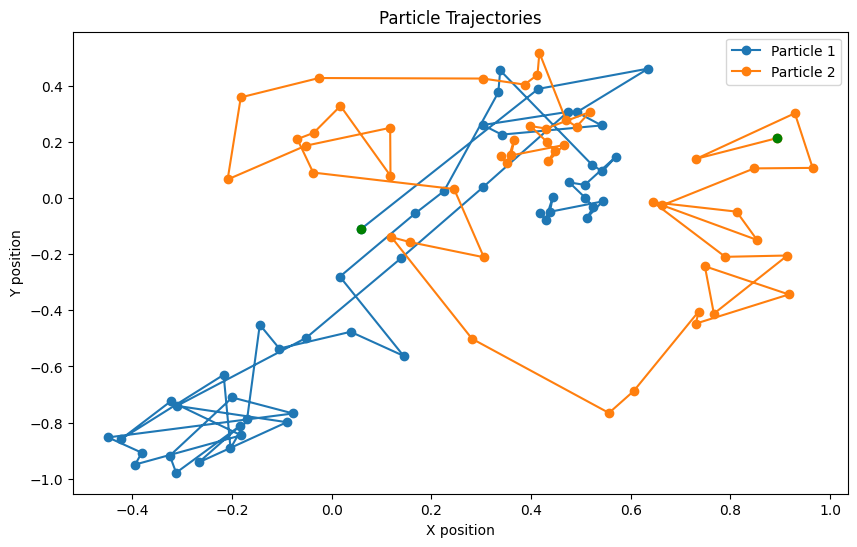

In [26]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Dibujar trayectorias para ambas partículas
for p in range(2):
    plt.plot(inputs[:, p, 0], inputs[:, p, 1], "o-", label=f"Particle {p+1}")

# Marcar las posiciones iniciales de las partículas
plt.plot(inputs[0, 0, 0], inputs[0, 0, 1], "o", color="green")
plt.plot(inputs[0, 1, 0], inputs[0, 1, 1], "o", color="green")

# Configuración del gráfico
plt.xlabel("X position")
plt.ylabel("Y position")
plt.legend()
plt.title("Particle Trajectories")
plt.show()

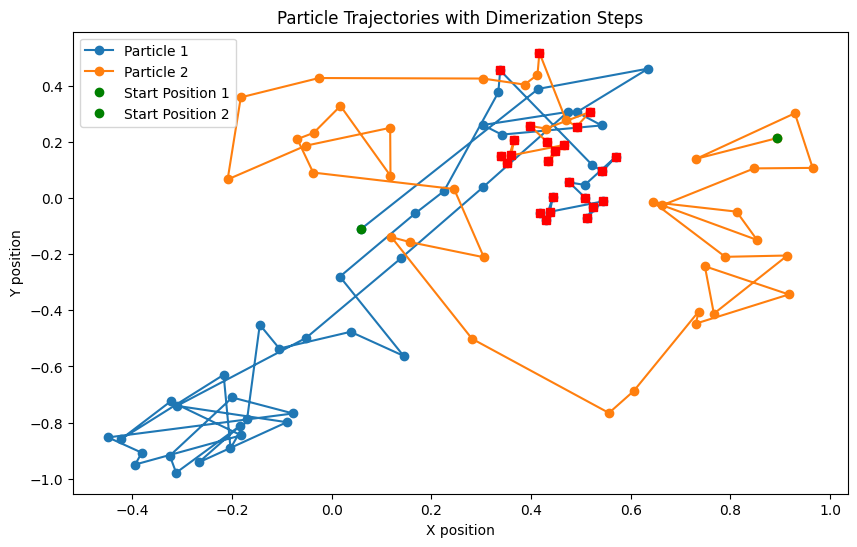

In [27]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Dibujar trayectorias para ambas partículas
for p in range(2):
    plt.plot(inputs[:, p, 0], inputs[:, p, 1], "o-", label=f"Particle {p+1}")

# Marcar las posiciones iniciales de las partículas
plt.plot(inputs[0, 0, 0], inputs[0, 0, 1], "o", color="green", label="Start Position 1")
plt.plot(inputs[0, 1, 0], inputs[0, 1, 1], "o", color="green", label="Start Position 2")

# Marcar los pasos donde las partículas dimerizan
for t in range(len(d["edges"])):
    if torch.any(d["edges"][t] == 1):  # Asumiendo que 1 indica dimerización
        plt.plot(inputs[t, 0, 0], inputs[t, 0, 1], "s", color="red", label="Dimerization Step" if t == 0 else "")
        plt.plot(inputs[t, 1, 0], inputs[t, 1, 1], "s", color="red")

# Configuración del gráfico
plt.xlabel("X position")
plt.ylabel("Y position")
plt.legend()
plt.title("Particle Trajectories with Dimerization Steps")
plt.show()



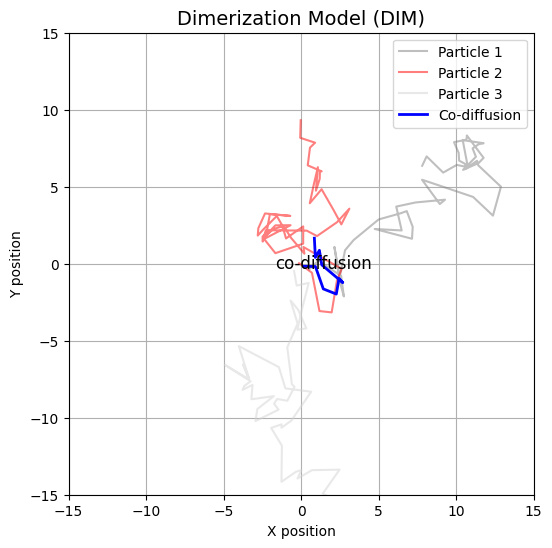

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Generar trayectorias aleatorias para las partículas
def random_walk(n_steps=100):
    x_steps = np.random.randn(n_steps)
    y_steps = np.random.randn(n_steps)
    x = np.cumsum(x_steps)
    y = np.cumsum(y_steps)
    return x, y

# Configuración de la figura
fig, ax = plt.subplots(figsize=(6, 6))

# Trayectorias individuales
x1, y1 = random_walk(n_steps=50)
x2, y2 = random_walk(n_steps=50)
x3, y3 = random_walk(n_steps=50)

# Asumimos que la dimerización ocurre en los primeros 10 pasos
x_dimer = np.mean([x1[:10], x2[:10]], axis=0)
y_dimer = np.mean([y1[:10], y2[:10]], axis=0)

# Graficar las trayectorias
ax.plot(x1, y1, color='gray', alpha=0.5, label="Particle 1")
ax.plot(x2, y2, color='red', alpha=0.5, label="Particle 2")
ax.plot(x3, y3, color='lightgray', alpha=0.5, label="Particle 3")

# Resaltar la co-difusión
ax.plot(x_dimer, y_dimer, color='blue', linewidth=2, label="Co-diffusion")

# Añadir texto
ax.text(np.mean(x_dimer), np.mean(y_dimer), 'co-diffusion', fontsize=12, ha='center')

# Añadir títulos y etiquetas
ax.set_title('Dimerization Model (DIM)', fontsize=14)
ax.set_xlabel('X position')
ax.set_ylabel('Y position')

# Limitar los ejes
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])

# Mostrar la leyenda
ax.legend()

# Mostrar la imagen
plt.grid(True)
plt.show()

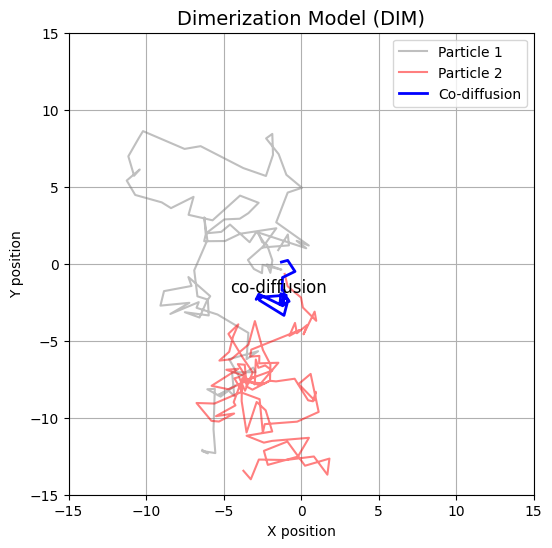

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Generar trayectorias aleatorias para las partículas
def random_walk(n_steps=100):
    x_steps = np.random.randn(n_steps)
    y_steps = np.random.randn(n_steps)
    x = np.cumsum(x_steps)
    y = np.cumsum(y_steps)
    return x, y

# Configuración de la figura
fig, ax = plt.subplots(figsize=(6, 6))

# Trayectorias individuales
x1, y1 = random_walk(n_steps=100)
x2, y2 = random_walk(n_steps=100)

# Asumimos que la dimerización ocurre en los primeros 20 pasos
x_dimer = np.mean([x1[:20], x2[:20]], axis=0)
y_dimer = np.mean([y1[:20], y2[:20]], axis=0)

# Graficar las trayectorias
ax.plot(x1, y1, color='gray', alpha=0.5, label="Particle 1")
ax.plot(x2, y2, color='red', alpha=0.5, label="Particle 2")

# Resaltar la co-difusión
ax.plot(x_dimer, y_dimer, color='blue', linewidth=2, label="Co-diffusion")

# Añadir texto
ax.text(np.mean(x_dimer), np.mean(y_dimer), 'co-diffusion', fontsize=12, ha='center')

# Añadir títulos y etiquetas
ax.set_title('Dimerization Model (DIM)', fontsize=14)
ax.set_xlabel('X position')
ax.set_ylabel('Y position')

# Limitar los ejes
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])

# Mostrar la leyenda
ax.legend()

# Mostrar la imagen
plt.grid(True)
plt.show()

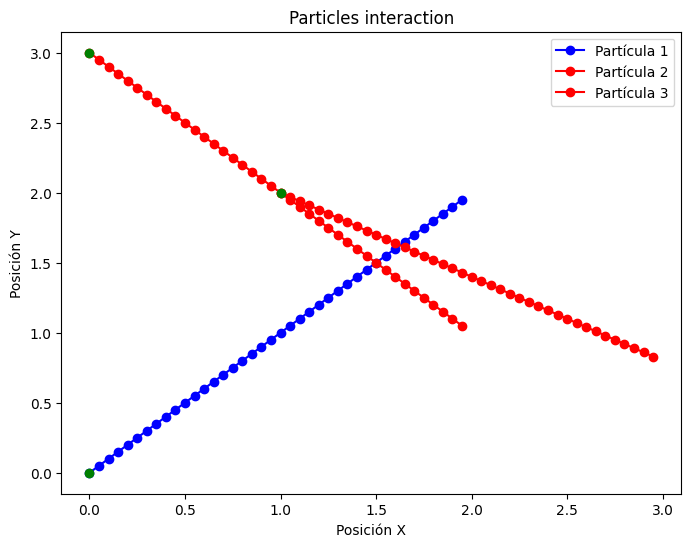

In [31]:
import matplotlib.pyplot as plt

# Generar datos de ejemplo para tres trayectorias
x1 = [i * 0.05 for i in range(40)]
y1 = [i * 0.05 for i in range(40)]

x2 = [1 + i * 0.05 for i in range(40)]
y2 = [2 - i * 0.03 for i in range(40)]

x3 = [i * 0.05 for i in range(40)]
y3 = [3 - i * 0.05 for i in range(40)]

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Trayectoria 1 (línea azul)
plt.plot(x1, y1, 'bo-', label="Partícula 1")

# Trayectoria 2 (línea roja)
plt.plot(x2, y2, 'ro-', label="Partícula 2")

# Trayectoria 3 (línea roja)
plt.plot(x3, y3, 'ro-', label="Partícula 3")

# Agregar puntos de inicio
plt.plot(x1[0], y1[0], 'go')  # Punto de inicio en verde
plt.plot(x2[0], y2[0], 'go')  # Punto de inicio en verde
plt.plot(x3[0], y3[0], 'go')  # Punto de inicio en verde

# Título y etiquetas
plt.title("Particles interaction")
plt.xlabel("Posición X")
plt.ylabel("Posición Y")

# Mostrar la leyenda
plt.legend()

# Mostrar la imagen
plt.show()


In [ ]:
model = torch.load("models/encoder_09_prior_1000")

In [ ]:
model.eval()
with torch.no_grad():
    edges_p, edges_enc, _ = model(inputs[None, ...].cpu())

edges_p = edges_p.cpu().detach()
edges_enc = edges_enc.cpu().detach()

In [ ]:
edges_enc.shape

torch.Size([1, 50, 2, 2])

In [ ]:
import numpy as np
ep = np.argmax(edges_p, axis=-1)
ec = np.argmax(edges_enc, axis=-1)

In [ ]:
ep

tensor([[[0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 1],
         [0, 0],
         [1, 1],
         [0, 0],
         [1, 1],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0]]])

In [ ]:
data_path = "/content/drive/MyDrive/relationalgnns/datasets"

train_edges_path = os.path.join(data_path, "train_edges")

train_edges = torch.load(train_edges_path)

print("Dimensiones de train_edges:", train_edges.shape)
print("Contenido de train_edges:")
print(train_edges[0])

Dimensiones de train_edges: torch.Size([1000, 50, 2])
Contenido de train_edges:
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


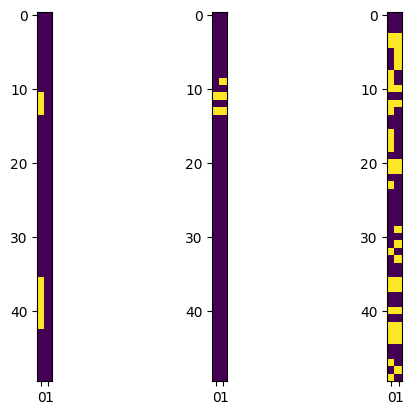

In [ ]:
plt.subplot(131)
plt.imshow(d["edges"])

plt.subplot(132)
plt.imshow(ep[0])

plt.subplot(133)
plt.imshow(ec[0])

In [ ]:
full_edge_count = 0.
correct_edges = 0.
edge_count = 0.
correct_0_edges = 0.
edge_0_count = 0.
correct_1_edges = 0.
edge_1_count = 0.
correct = num_predicted = num_gt = 0

edge_count += ep[0].numel()
full_edge_count += d["edges"].numel()
correct_edges += ((ep[0] == d["edges"])).sum().item()
edge_0_count += (d["edges"] == 0).sum().item()
edge_1_count += (d["edges"] == 1).sum().item()
correct_0_edges += ((ep[0] == d["edges"])*(d["edges"] == 0)).sum().item()
correct_1_edges += ((ep[0] == d["edges"])*(d["edges"] == 1)).sum().item()
correct += (ep[0]*d["edges"]).sum().item()
num_predicted += ep[0].sum().item()
num_gt += d["edges"].sum().item()
prec = correct / (num_predicted + 1e-8)
rec = correct / (num_gt + 1e-8)
f1 = 2*prec*rec / (prec+rec+1e-6)

f1

0.26666622186740724

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert tensors to numpy arrays
edges_np = d["edges"].numpy()
ep_np = ep.numpy()

# Flatten the arrays for evaluation
edges_flat = edges_np.flatten()
ep_flat = ep_np.flatten()

# Calculate metrics
accuracy = accuracy_score(edges_flat, ep_flat)
precision = precision_score(edges_flat, ep_flat, average='binary')
recall = recall_score(edges_flat, ep_flat, average='binary')
f1 = f1_score(edges_flat, ep_flat, average='binary')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.89
Precision: 0.4
Recall: 0.2
F1 Score: 0.26666666666666666


______________________________________________________
_____________________________________________________
_________________________________________________

**Modelo con 3 trayectorias**

_________________________________________________
_________________________________________________
__________________________________________________

In [ ]:
from andi_datasets.models_phenom import models_phenom
import numpy as np
import stochastic

# number of time steps per trajectory (frames)
T = 50
# number of trajectories
N = 3
# Length of box (pixels)
L = 1.5*128
# diffusion coefficient (pixels^2 / frame)
D = 0.1

trajs_model3, labels_model3 = models_phenom().dimerization(N = N,
                                                           L = L,
                                                           T = T,
                                                           alphas = [1, 0.9], # Fixed alpha for each state
                                                           Ds = [10*D, 1.0*D], # Fixed D for each state
                                                           r = 1, # Radius of the particles
                                                           Pb = 1, # Binding probability
                                                           Pu = 0.2 # Unbinding probability
                                                           )

In [ ]:
print(labels_model3)

[[[1.  1.  2. ]
  [1.  1.  2. ]
  [1.  1.  2. ]]

 [[1.  1.  2. ]
  [1.  1.  2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[1.  1.  2. ]
  [1.  1.  2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[1.  1.  2. ]
  [1.  1.  2. ]
  [1.  1.  2. ]]

 [[1.  1.  2. ]
  [1.  1.  2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[1.  1.  2. ]
  [1.  1.  2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]

 [[0.9 0.1 2. ]
  [0.9 0.1 2. ]
  [1.  1.  2. ]]



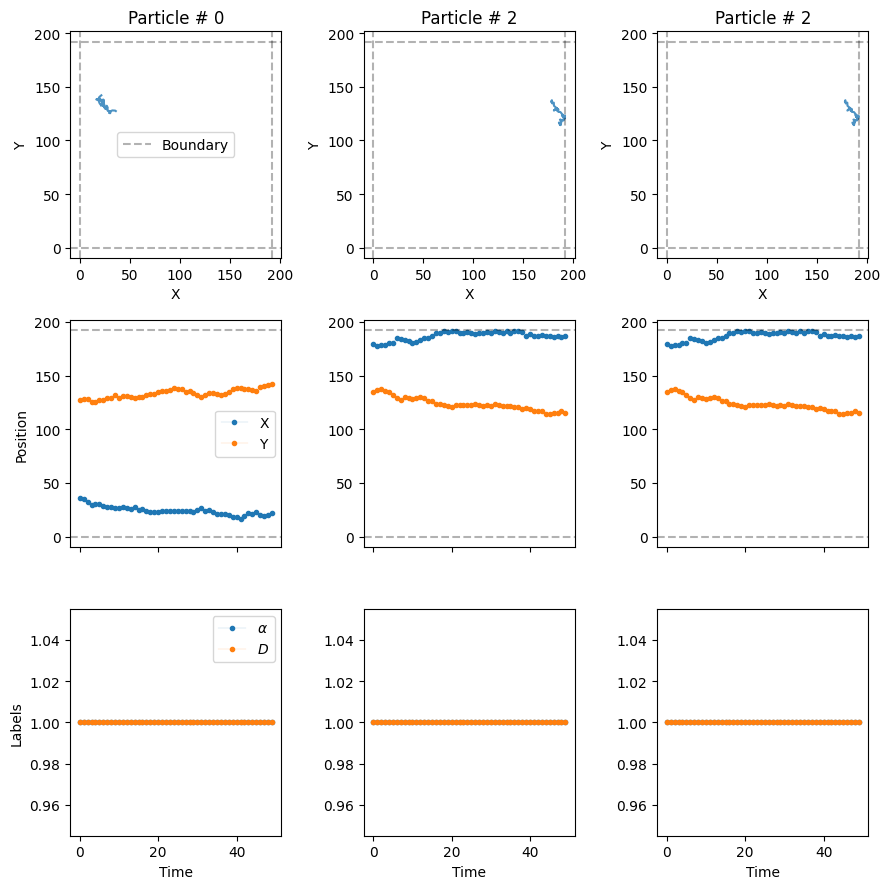

In [ ]:
from andi_datasets.utils_trajectories import plot_trajs

plot_trajs(trajs_model3, L, N, labels = labels_model3, plot_labels = True)

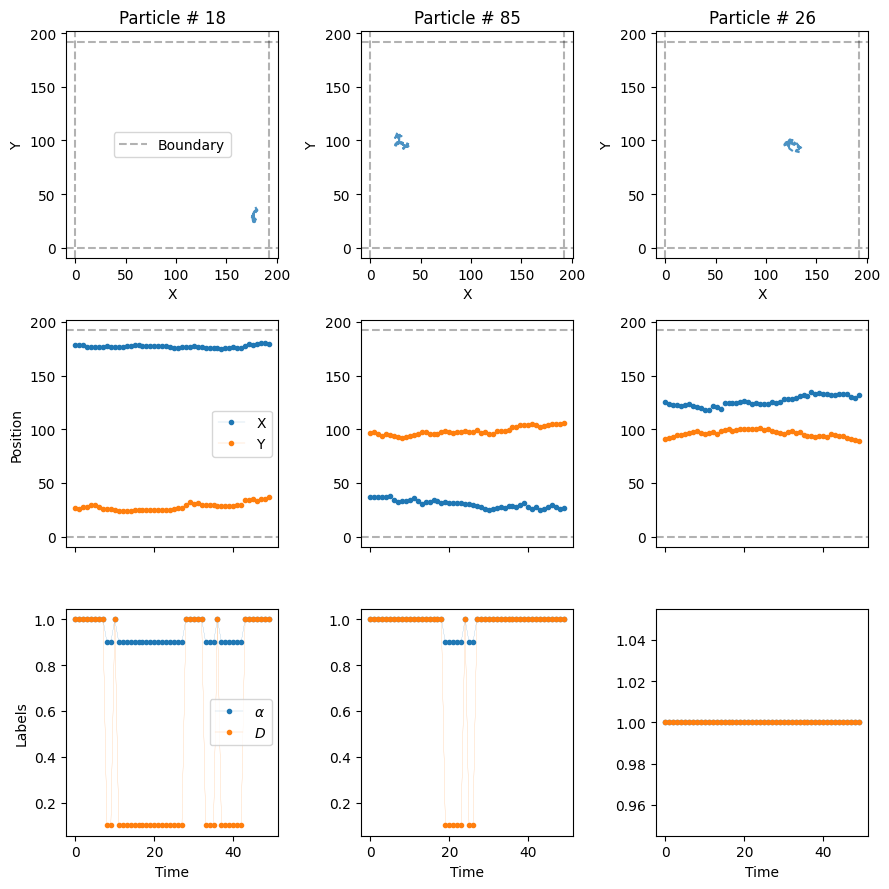

In [ ]:
from andi_datasets.utils_trajectories import plot_trajs

plot_trajs(trajs_model3, L, N, labels = labels_model3, plot_labels = True)

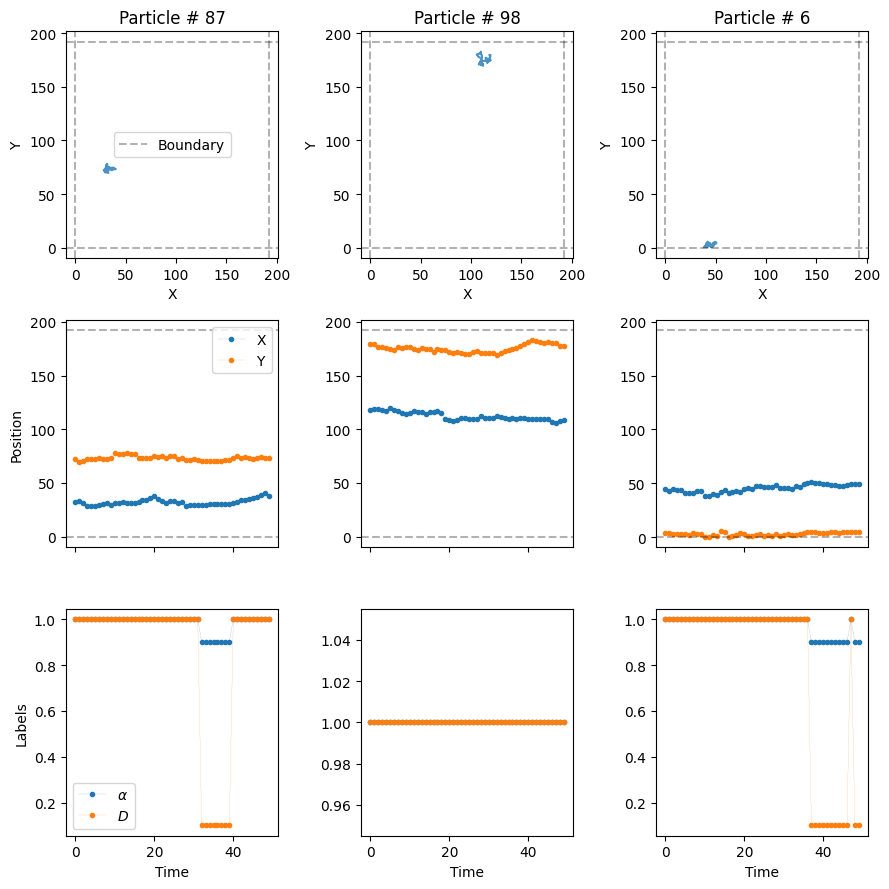

In [ ]:
from andi_datasets.utils_trajectories import plot_trajs

plot_trajs(trajs_model3, L, N, labels = labels_model3, plot_labels = True)

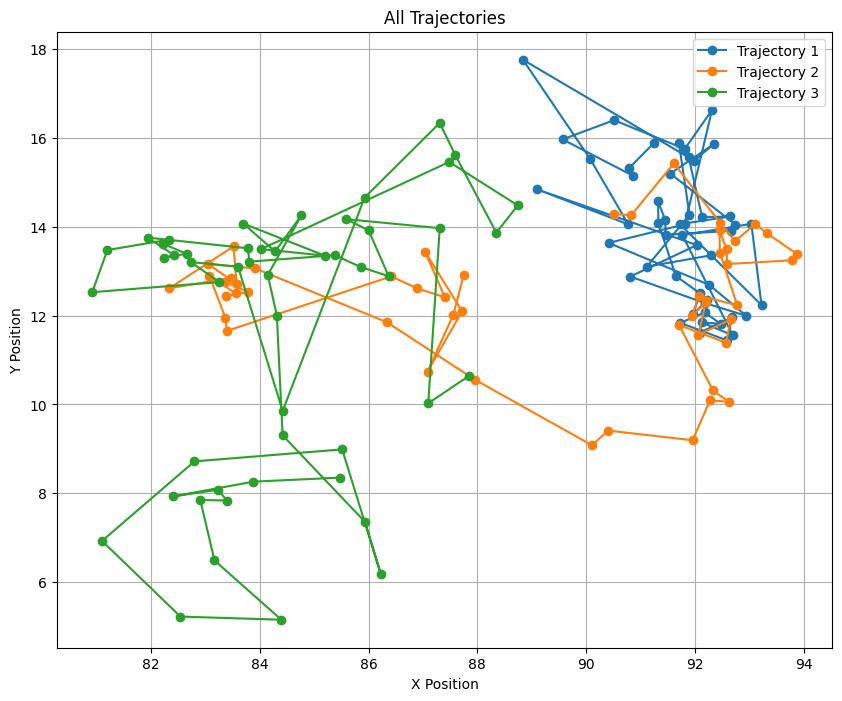

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 8))

for i in range(N):
    trajectory = trajs_model3[:, i, :]
    plt.plot(trajectory[:, 0], trajectory[:, 1], linestyle='-', marker='o', label=f'Trajectory {i+1}')


plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('All Trajectories')
plt.legend(loc='best')
plt.grid(True)
plt.show()

_______________________________________________
______________________________________________________
________________________________________________________

**Generacion de datos**

________________________________________________
_________________________________________________
_________________________________________________

In [ ]:
import os
project_dir = '/content/drive/MyDrive/relationalgnns1'
os.chdir(project_dir)

In [ ]:
import numpy as np
from andi_datasets.models_phenom import models_phenom

all_data = []

def generate_and_store_data(T, N, L, D, alphas, Ds, r, Pb, Pu):
    while True:
        trajs_model3, labels_model3 = models_phenom().dimerization(
            N=N,
            L=L,
            T=T,
            alphas=alphas,  # Exponentes anómalos
            Ds=Ds,  # Coeficientes de difusión
            r=r,  # Radio de las partículas
            Pb=Pb,  # Probabilidad de unión
            Pu=Pu  # Probabilidad de desunión
        )

        # Verificar dimerización en las dos primeras trayectorias
        has_dimerization_first_two = any(np.any(labels_model3[:, i, 0] == 0.9) for i in range(2))

        # Verificar que la tercera trayectoria no tenga dimerización
        no_dimerization_third = not np.any(labels_model3[:, 2, 0] == 0.9)

        if has_dimerization_first_two and no_dimerization_third:
            all_data.append((trajs_model3, labels_model3))
            break

T = 50  # Número de pasos de tiempo por trayectoria
N = 3  # Número de trayectorias
L = 1.5 * 128  # Tamaño de la caja (en píxeles)
D = 0.1  # Coeficiente de difusión (en píxeles^2 / frame)
alphas = [1.0, 0.9]  # Exponentes anómalos
Ds = [10 * D, 1.0 * D]  # Coeficientes de difusión
r = 1  # Radio de las partículas
Pb = 1  # Probabilidad de unión
Pu = 0.1  # Probabilidad de desunión (para que se separen después de unirse)

for i in range(1000):
    generate_and_store_data(T, N, L, D, alphas, Ds, r, Pb, Pu)

print("Generated 1000 datasets with dimerization")

for i, (trajs, labels) in enumerate(all_data[:5]):
    print(f"Dataset {i+1}:")
    print("Trajectories:")
    print(trajs)
    print("Labels:")
    print(labels)
    print("\n")


Generated 100 datasets with dimerization
Dataset 1:
Trajectories:
[[[4.86101643e-01 1.88612539e+02]
  [4.34404235e+00 1.84286773e+02]
  [2.41395393e+01 1.24990445e+02]]

 [[2.91931420e-01 1.91547152e+02]
  [7.00721846e+00 1.84903430e+02]
  [2.24420322e+01 1.23782271e+02]]

 [[1.34486406e+00 1.91784193e+02]
  [6.73725895e+00 1.84680470e+02]
  [2.28762810e+01 1.24464933e+02]]

 [[1.02043655e+00 1.91661357e+02]
  [4.14840643e+00 1.83421336e+02]
  [2.42001895e+01 1.23987333e+02]]

 [[2.36436928e+00 1.90537757e+02]
  [3.11986433e+00 1.84731571e+02]
  [2.29689307e+01 1.23878979e+02]]

 [[6.64990065e-01 1.91144607e+02]
  [2.67590104e+00 1.83395002e+02]
  [2.46186834e+01 1.26019436e+02]]

 [[2.29371298e+00 1.90020944e+02]
  [3.45708138e+00 1.84508888e+02]
  [2.35310359e+01 1.26708740e+02]]

 [[2.41342665e+00 1.90210358e+02]
  [3.58442599e+00 1.84145359e+02]
  [2.11969510e+01 1.26666579e+02]]

 [[2.25557683e+00 1.89747059e+02]
  [5.27263407e+00 1.84598276e+02]
  [2.01836074e+01 1.27195157e+02]]

In [ ]:
import torch
import numpy as np

# Parámetros
num_datasets = len(all_data)
timesteps = 50
num_particles = 3  # Cambiado a 3 partículas
num_features = 2  # Solo x, y

# Inicializar tensores vacíos
train_feats = torch.zeros((num_datasets, timesteps, num_particles, num_features))
train_edges = torch.zeros((num_datasets, timesteps, num_particles * (num_particles - 1)))

for i, (trajs, labels) in enumerate(all_data):
    for t in range(timesteps):
        for p in range(num_particles):
            x, y = trajs[t][p]
            train_feats[i, t, p, :] = torch.tensor([x, y])

        # Determinar si las partículas interactúan
        interact_12 = 1 if labels[t][0][0] == 0.9 and labels[t][1][0] == 0.9 else 0
        interact_13 = 0  # La tercera trayectoria no debe tener dimerización
        interact_23 = 0  # La tercera trayectoria no debe tener dimerización
        train_edges[i, t, 0] = interact_12
        train_edges[i, t, 1] = interact_13
        train_edges[i, t, 2] = interact_23

In [ ]:
import torch
import numpy as np

# Parámetros
num_datasets = len(all_data)
timesteps = 50
num_particles = 3
num_features = 2  # Solo x, y

# Inicializar tensores vacíos
train_feats = torch.zeros((num_datasets, timesteps, num_particles, num_features))
train_edges = torch.zeros((num_datasets, timesteps, num_particles * (num_particles - 1)))

for i, (trajs, labels) in enumerate(all_data):
    trajs = np.array(trajs)
    labels = np.array(labels)

    # Cargar las trayectorias en el tensor
    train_feats[i] = torch.tensor(trajs[:timesteps, :, :2])

    # Determinar las interacciones de las partículas
    interact_12 = (labels[:timesteps, 0, 0] == 0.9) & (labels[:timesteps, 1, 0] == 0.9)
    train_edges[i, :, 0] = torch.tensor(interact_12, dtype=torch.float32)
    train_edges[i, :, 1:3] = 0  # Las demás interacciones son 0

In [ ]:
train_edges[3]

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0

In [ ]:
print("train_feats shape:", train_feats.shape)
print("train_feats:", train_feats[0])
print("train_edges shape:", train_edges.shape)
print("train_edges", train_edges[0])

train_feats shape: torch.Size([2000, 50, 3, 2])
train_feats: tensor([[[4.8610e-01, 1.8861e+02],
         [4.3440e+00, 1.8429e+02],
         [2.4140e+01, 1.2499e+02]],

        [[2.9193e-01, 1.9155e+02],
         [7.0072e+00, 1.8490e+02],
         [2.2442e+01, 1.2378e+02]],

        [[1.3449e+00, 1.9178e+02],
         [6.7373e+00, 1.8468e+02],
         [2.2876e+01, 1.2446e+02]],

        [[1.0204e+00, 1.9166e+02],
         [4.1484e+00, 1.8342e+02],
         [2.4200e+01, 1.2399e+02]],

        [[2.3644e+00, 1.9054e+02],
         [3.1199e+00, 1.8473e+02],
         [2.2969e+01, 1.2388e+02]],

        [[6.6499e-01, 1.9114e+02],
         [2.6759e+00, 1.8340e+02],
         [2.4619e+01, 1.2602e+02]],

        [[2.2937e+00, 1.9002e+02],
         [3.4571e+00, 1.8451e+02],
         [2.3531e+01, 1.2671e+02]],

        [[2.4134e+00, 1.9021e+02],
         [3.5844e+00, 1.8415e+02],
         [2.1197e+01, 1.2667e+02]],

        [[2.2556e+00, 1.8975e+02],
         [5.2726e+00, 1.8460e+02],
         [2.0

In [ ]:
torch.save(train_feats, 'train_feats')
torch.save(train_edges, 'train_edges')

_____________________________________________________________
______________________________________________________
__________________________________________________________

**Entrenamiento del modelo con los datos de dimerizacion**

_______________________________________________
____________________________________________________
________________________________________________

In [ ]:
import os
project_dir = '/content/drive/MyDrive/relationalgnns'
os.chdir(project_dir)

In [ ]:
pip install torch numpy tqdm

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!python train.py

^C


_______________________________________________
_________________________________________________
__________________________________________

**Evaluacion del modelo**

_____________________________________________________
__________________________________________________________
___________________________________________________

In [ ]:
import torch
from torch.utils.data import DataLoader

import relg

In [ ]:
dataset = relg.SynthDataLoader(
    "datasets", "train")

In [ ]:
data = iter(dataset)

In [ ]:
d = next(data)
inputs = d["inputs"]

In [ ]:
d

{'inputs': tensor([[[-0.2761, -0.5076],
          [-0.0327, -0.3580],
          [ 0.3336,  0.0139]],
 
         [[-0.2583, -0.4466],
          [-0.1660, -0.4020],
          [ 0.2748,  0.0765]],
 
         [[-0.2975, -0.3923],
          [-0.2053, -0.3477],
          [ 0.4052,  0.2360]],
 
         [[-0.3098, -0.4380],
          [-0.2175, -0.3933],
          [ 0.4121,  0.1822]],
 
         [[-0.3026, -0.4853],
          [-0.2103, -0.4407],
          [ 0.5857,  0.3089]],
 
         [[-0.2968, -0.4522],
          [-0.2046, -0.4076],
          [ 0.4893,  0.3576]],
 
         [[-0.2919, -0.5465],
          [-0.1996, -0.5019],
          [ 0.4926,  0.2702]],
 
         [[-0.3647, -0.5347],
          [-0.2725, -0.4900],
          [ 0.4370,  0.2255]],
 
         [[-0.3371, -0.5027],
          [-0.2449, -0.4581],
          [ 0.4657,  0.3305]],
 
         [[-0.3273, -0.4793],
          [-0.2350, -0.4347],
          [ 0.2798,  0.3838]],
 
         [[ 0.0158, -0.1316],
          [-0.3363, -0.4449],


In [ ]:
d["edges"]

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0

In [ ]:
inputs

tensor([[[-0.2761, -0.5076],
         [-0.0327, -0.3580],
         [ 0.3336,  0.0139]],

        [[-0.2583, -0.4466],
         [-0.1660, -0.4020],
         [ 0.2748,  0.0765]],

        [[-0.2975, -0.3923],
         [-0.2053, -0.3477],
         [ 0.4052,  0.2360]],

        [[-0.3098, -0.4380],
         [-0.2175, -0.3933],
         [ 0.4121,  0.1822]],

        [[-0.3026, -0.4853],
         [-0.2103, -0.4407],
         [ 0.5857,  0.3089]],

        [[-0.2968, -0.4522],
         [-0.2046, -0.4076],
         [ 0.4893,  0.3576]],

        [[-0.2919, -0.5465],
         [-0.1996, -0.5019],
         [ 0.4926,  0.2702]],

        [[-0.3647, -0.5347],
         [-0.2725, -0.4900],
         [ 0.4370,  0.2255]],

        [[-0.3371, -0.5027],
         [-0.2449, -0.4581],
         [ 0.4657,  0.3305]],

        [[-0.3273, -0.4793],
         [-0.2350, -0.4347],
         [ 0.2798,  0.3838]],

        [[ 0.0158, -0.1316],
         [-0.3363, -0.4449],
         [ 0.3371,  0.1735]],

        [[ 0.0526, -0

In [ ]:
d

{'inputs': tensor([[[-0.2761, -0.5076],
          [-0.0327, -0.3580],
          [ 0.3336,  0.0139]],
 
         [[-0.2583, -0.4466],
          [-0.1660, -0.4020],
          [ 0.2748,  0.0765]],
 
         [[-0.2975, -0.3923],
          [-0.2053, -0.3477],
          [ 0.4052,  0.2360]],
 
         [[-0.3098, -0.4380],
          [-0.2175, -0.3933],
          [ 0.4121,  0.1822]],
 
         [[-0.3026, -0.4853],
          [-0.2103, -0.4407],
          [ 0.5857,  0.3089]],
 
         [[-0.2968, -0.4522],
          [-0.2046, -0.4076],
          [ 0.4893,  0.3576]],
 
         [[-0.2919, -0.5465],
          [-0.1996, -0.5019],
          [ 0.4926,  0.2702]],
 
         [[-0.3647, -0.5347],
          [-0.2725, -0.4900],
          [ 0.4370,  0.2255]],
 
         [[-0.3371, -0.5027],
          [-0.2449, -0.4581],
          [ 0.4657,  0.3305]],
 
         [[-0.3273, -0.4793],
          [-0.2350, -0.4347],
          [ 0.2798,  0.3838]],
 
         [[ 0.0158, -0.1316],
          [-0.3363, -0.4449],


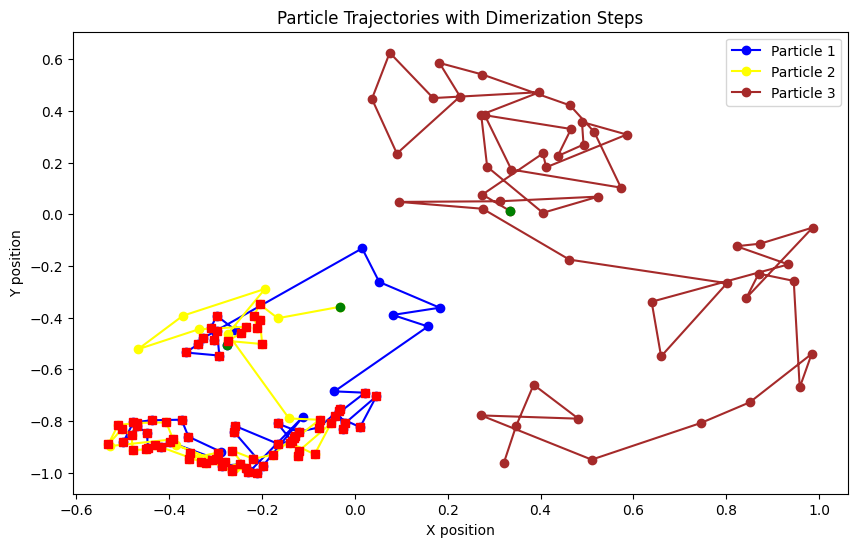

In [ ]:
import matplotlib.pyplot as plt

# Visualizar las trayectorias de las partículas
plt.figure(figsize=(10, 6))

# Colores para las partículas
colors = ["blue", "yellow", "brown"]

# Partículas en todos los pasos de tiempo
for p in range(3):
    plt.plot(inputs[:, p, 0], inputs[:, p, 1], "o-", label=f"Particle {p+1}", color=colors[p])

# Posiciones iniciales de las partículas
for p in range(3):
    plt.plot(inputs[0, p, 0], inputs[0, p, 1], "o", color="green")

# Marcar los pasos donde las partículas 1 y 2 dimerizan
for t in range(len(d["edges"])):
    if d["edges"][t, 0] == 1:  # Asumiendo que el primer valor indica la dimerización de las partículas 1 y 2
        plt.plot(inputs[t, 0, 0], inputs[t, 0, 1], "s", color="red", label="Dimerization Step" if t == 0 else "")
        plt.plot(inputs[t, 1, 0], inputs[t, 1, 1], "s", color="red")

plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Particle Trajectories with Dimerization Steps')
plt.legend()
plt.show()


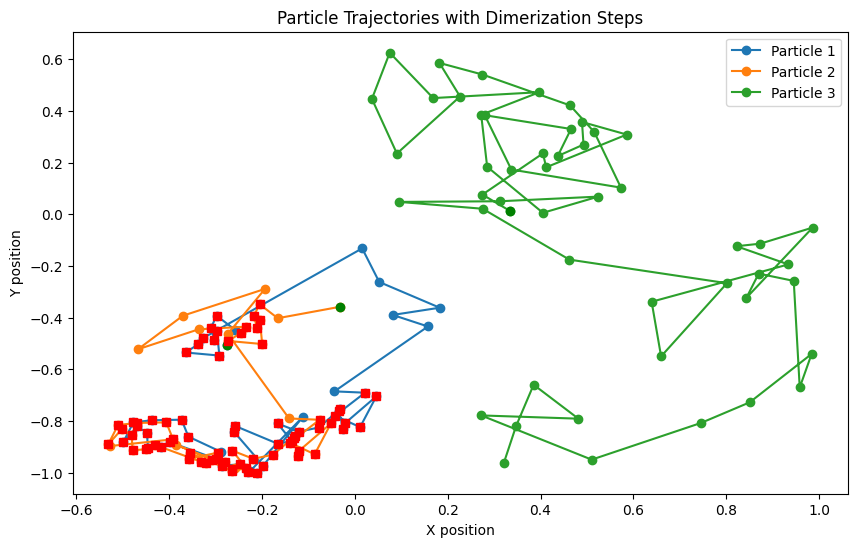

In [ ]:
import matplotlib.pyplot as plt

# Visualizar las trayectorias de las partículas
plt.figure(figsize=(10, 6))

# Partículas en todos los pasos de tiempo
for p in range(3):
    plt.plot(inputs[:, p, 0], inputs[:, p, 1], "o-", label=f"Particle {p+1}")

# Posiciones iniciales de las partículas
for p in range(3):
    plt.plot(inputs[0, p, 0], inputs[0, p, 1], "o", color="green")

# Marcar los pasos donde las partículas 1 y 2 dimerizan
for t in range(len(d["edges"])):
    if d["edges"][t, 0] == 1:  # Asumiendo que el primer valor indica la dimerización de las partículas 1 y 2
        plt.plot(inputs[t, 0, 0], inputs[t, 0, 1], "s", color="red", label="Dimerization Step" if t == 0 else "")
        plt.plot(inputs[t, 1, 0], inputs[t, 1, 1], "s", color="red")

plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Particle Trajectories with Dimerization Steps')
plt.legend()
plt.show()


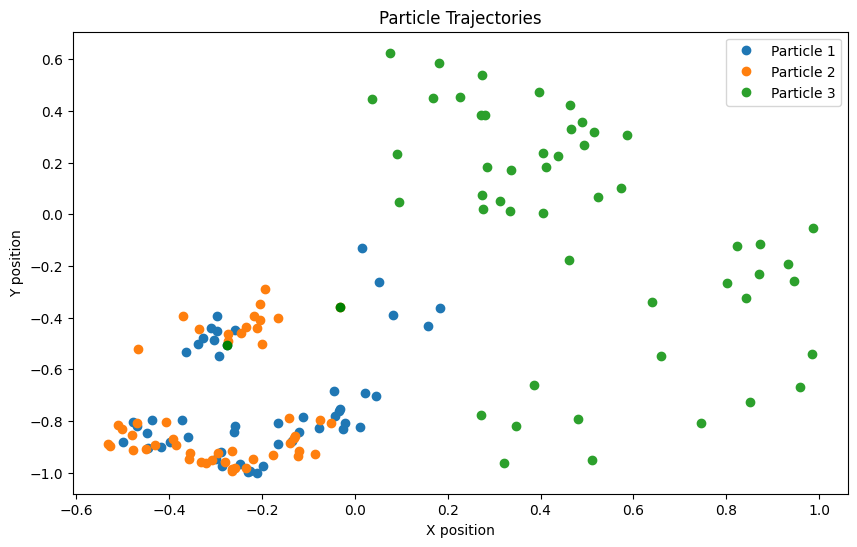

In [ ]:
import matplotlib.pyplot as plt

# Visualizar las trayectorias de las partículas
plt.figure(figsize=(10, 6))

# Partículas en todos los pasos de tiempo
for p in range(3):
    plt.plot(inputs[:, p, 0], inputs[:, p, 1], "o", label=f"Particle {p+1}")

# Posiciones iniciales de las partículas
for p in range(2):
    plt.plot(inputs[0, p, 0], inputs[0, p, 1], "o", color="green")

plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Particle Trajectories')
plt.legend()
plt.show()

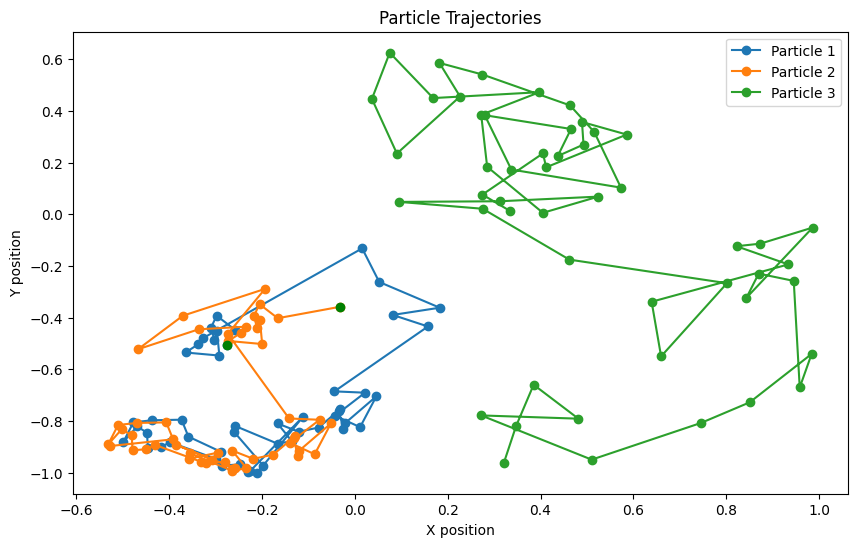

In [ ]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Dibujar trayectorias para ambas partículas
for p in range(3):
    plt.plot(inputs[:, p, 0], inputs[:, p, 1], "o-", label=f"Particle {p+1}")

# Marcar las posiciones iniciales de las partículas
plt.plot(inputs[0, 0, 0], inputs[0, 0, 1], "o", color="green")
plt.plot(inputs[0, 1, 0], inputs[0, 1, 1], "o", color="green")

# Configuración del gráfico
plt.xlabel("X position")
plt.ylabel("Y position")
plt.legend()
plt.title("Particle Trajectories")
plt.show()

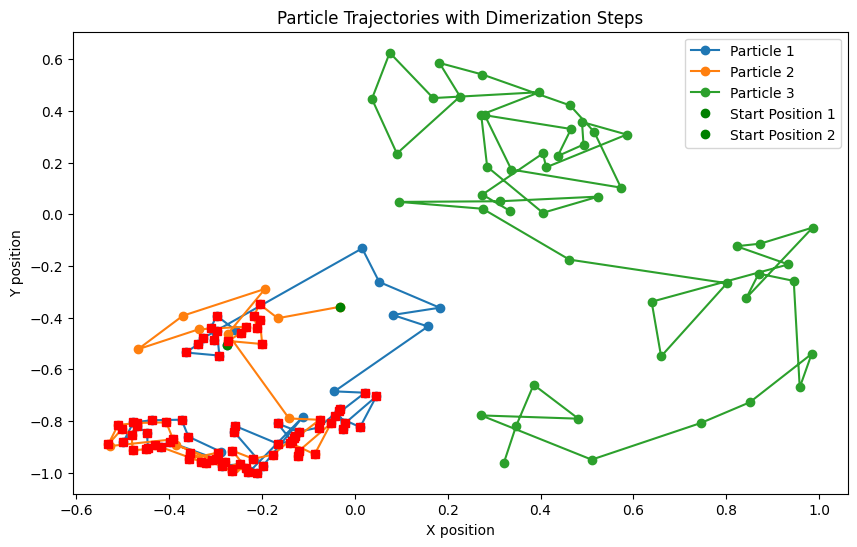

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Dibujar trayectorias para ambas partículas
for p in range(3):
    plt.plot(inputs[:, p, 0], inputs[:, p, 1], "o-", label=f"Particle {p+1}")

# Marcar las posiciones iniciales de las partículas
plt.plot(inputs[0, 0, 0], inputs[0, 0, 1], "o", color="green", label="Start Position 1")
plt.plot(inputs[0, 1, 0], inputs[0, 1, 1], "o", color="green", label="Start Position 2")

# Marcar los pasos donde las partículas dimerizan
for t in range(len(d["edges"])):
    if torch.any(d["edges"][t] == 1):  # Asumiendo que 1 indica dimerización
        plt.plot(inputs[t, 0, 0], inputs[t, 0, 1], "s", color="red", label="Dimerization Step" if t == 0 else "")
        plt.plot(inputs[t, 1, 0], inputs[t, 1, 1], "s", color="red")

# Configuración del gráfico
plt.xlabel("X position")
plt.ylabel("Y position")
plt.legend()
plt.title("Particle Trajectories with Dimerization Steps")
plt.show()

In [ ]:
model = torch.load("models/encoder_09_prior_3_p")

In [ ]:
model.eval()
with torch.no_grad():
    edges_p, edges_enc, _ = model(inputs[None, ...].cpu())

edges_p = edges_p.cpu().detach()
edges_enc = edges_enc.cpu().detach()

In [ ]:
edges_enc.shape

torch.Size([1, 50, 6, 2])

In [ ]:
import numpy as np
ep = np.argmax(edges_p, axis=-1)
ec = np.argmax(edges_enc, axis=-1)

In [ ]:
ep

tensor([[[1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1

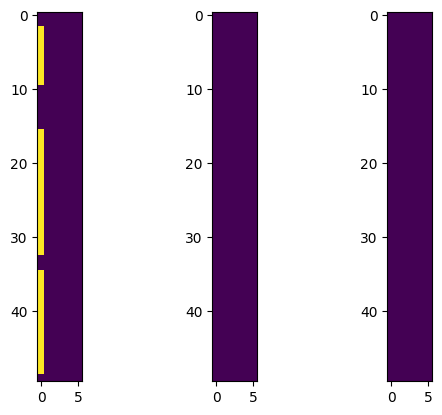

In [ ]:
plt.subplot(131)
plt.imshow(d["edges"])

plt.subplot(132)
plt.imshow(ep[0])

plt.subplot(133)
plt.imshow(ec[0])

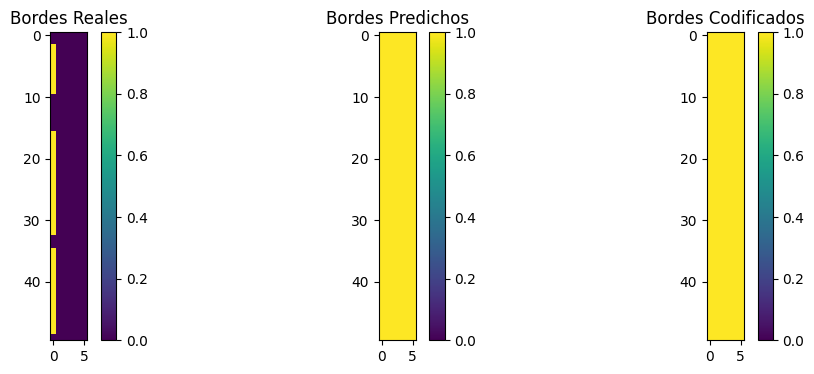

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(d["edges"], cmap='viridis', vmin=0, vmax=1)
plt.title('Bordes Reales')
plt.colorbar()

plt.subplot(132)
plt.imshow(ep[0], cmap='viridis', vmin=0, vmax=1)
plt.title('Bordes Predichos')
plt.colorbar()

plt.subplot(133)
plt.imshow(ec[0], cmap='viridis', vmin=0, vmax=1)
plt.title('Bordes Codificados')
plt.colorbar()

plt.show()

In [ ]:
full_edge_count = 0.
correct_edges = 0.
edge_count = 0.
correct_0_edges = 0.
edge_0_count = 0.
correct_1_edges = 0.
edge_1_count = 0.
correct = num_predicted = num_gt = 0

edge_count += ep[0].numel()
full_edge_count += d["edges"].numel()
correct_edges += ((ep[0] == d["edges"])).sum().item()
edge_0_count += (d["edges"] == 0).sum().item()
edge_1_count += (d["edges"] == 1).sum().item()
correct_0_edges += ((ep[0] == d["edges"])*(d["edges"] == 0)).sum().item()
correct_1_edges += ((ep[0] == d["edges"])*(d["edges"] == 1)).sum().item()
correct += (ep[0]*d["edges"]).sum().item()
num_predicted += ep[0].sum().item()
num_gt += d["edges"].sum().item()
prec = correct / (num_predicted + 1e-8)
rec = correct / (num_gt + 1e-8)
f1 = 2*prec*rec / (prec+rec+1e-6)

f1

0.23008829194368918